# COMBINING DATA USING MERGE AND CONCATENATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
happiness2015=pd.read_csv("/storage/emulated/0/Download/World_Happiness_2015.csv")
happiness2016=pd.read_csv("/storage/emulated/0/Download/World_Happiness_2016.csv")
happiness2017=pd.read_csv("/storage/emulated/0/Download/World_Happiness_2017.csv")
#Create a year colunmn in each dataframe and set the year accordingly
happiness2015["Year"]=2015
happiness2016["Year"]=2016
happiness2017["Year"]=2017

head2015=happiness2015[["Country", "Region", "Happiness Rank"]].head(3)
head2016=happiness2016[["Country", "Region", "Happiness Rank"]].head(3)
                        

In [3]:
head2015

,Country,Region,Happiness Rank
0,Switzerland,Western Europe,1
1,Iceland,Western Europe,2
2,Denmark,Western Europe,3


In [4]:
head2016

,Country,Region,Happiness Rank
0,Denmark,Western Europe,1
1,Switzerland,Western Europe,2
2,Iceland,Western Europe,3


# CONCATENATE

The concatenate function joins dataframes in two ways, both vertically and horizontally. It can be thought of as gluing both dataframes together. It makes use of the outer join method, which involves joining the entire datasets of the dataframes together. In concatenating dataframes, the indexes can be altered, if left the way they are after joining, it might throw an error. Dataframes of different shapes and sizes can be concatenated. Concatenating horizontally, the axis is set to 1, while concatemating vertically, the axis is 0 by default.

When using the concatenate function, the dataframes to be concatenated are passed into a list.

In [5]:
concat_axis0=pd.concat([head2015, head2016])
concat_axis1=pd.concat([head2015, head2016], axis=1)

In [6]:
concat_axis1

,Country,Region,Happiness Rank,Country,Region,Happiness Rank
0,Switzerland,Western Europe,1,Denmark,Western Europe,1
1,Iceland,Western Europe,2,Switzerland,Western Europe,2
2,Denmark,Western Europe,3,Iceland,Western Europe,3


In [7]:
head2015=happiness2015[["Country","Region", "Happiness Rank", "Standard Error"]].head(3)

In [8]:
concat_axis0=pd.concat([head2015, head2016], ignore_index=True)#ignore
#index parameter is used to reset the index, its default is False.

concat_axis1=pd.concat([head2015, head2016], axis=1)



/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [9]:
concat_axis0

,Country,Happiness Rank,Region,Standard Error
0,Switzerland,1,Western Europe,0.03411
1,Iceland,2,Western Europe,0.04884
2,Denmark,3,Western Europe,0.03328
3,Denmark,1,Western Europe,NaN
4,Switzerland,2,Western Europe,NaN
5,Iceland,3,Western Europe,NaN


In [10]:
concat_axis1

,Country,Region,Happiness Rank,Standard Error,Country,Region,Happiness Rank
0,Switzerland,Western Europe,1,0.03411,Denmark,Western Europe,1
1,Iceland,Western Europe,2,0.04884,Switzerland,Western Europe,2
2,Denmark,Western Europe,3,0.03328,Iceland,Western Europe,3


In [11]:
three_2015=happiness2015[["Country", "Region","Year"]].iloc[2:5]

three_2016=happiness2016[["Country", "Region", "Year"]].iloc[2:5]

In [12]:
three_2015

,Country,Region,Year
2,Denmark,Western Europe,2015
3,Norway,Western Europe,2015
4,Canada,North America,2015


In [13]:
three_2016

,Country,Region,Year
2,Iceland,Western Europe,2016
3,Norway,Western Europe,2016
4,Finland,Western Europe,2016


# MERGE

## JOINING ON COLUMNS

The merge function joins dataframes only horizontally. In using the merge function, dataframes can be joined on a key either on column or on index. The merge function defaults mood of joining daframe is the inner join. The method of join can be changed using the **how** parameter.

In [14]:
#Here, the how parameter is set to default, which is inner, and thats
#why the out is just the intersection of both dataframes obtained
#on the key on which the join is defined.
pd.merge(left=three_2015, right=three_2016, on="Country")


,Country,Region_x,Year_x,Region_y,Year_y
0,Norway,Western Europe,2015,Western Europe,2016


In [15]:
pd.merge(left=three_2015, right=three_2016, on ="Country", how="left")

,Country,Region_x,Year_x,Region_y,Year_y
0,Denmark,Western Europe,2015,NaN,NaN
1,Norway,Western Europe,2015,Western Europe,2016.0
2,Canada,North America,2015,NaN,NaN


In [16]:
pd.merge(left=three_2016, right=three_2015, on="Country", how="left")

,Country,Region_x,Year_x,Region_y,Year_y
0,Iceland,Western Europe,2016,NaN,NaN
1,Norway,Western Europe,2016,Western Europe,2015.0
2,Finland,Western Europe,2016,NaN,NaN


If we take a closer look at our output, we see that setting the how parametet to "how" which is the default resulted in a fewer rows thqn when the "how" was set to left. 

The left join includes all rows from the left dataframe alongside any row from the right that has a corresponding key. A closer look also shows us that the merge function added a "_x", "_y" to the column names. These suffixes do not pass a really clear message. The merge function has a parameter know as suffixes can be used to change these defualt suffixes.

In [17]:
#the suffixes parameter gives a more meaningful definition to the column names
pd.merge(left=three_2015, right=three_2016, on="Country", how="left", suffixes=("_2015", "_2016"))

,Country,Region_2015,Year_2015,Region_2016,Year_2016
0,Denmark,Western Europe,2015,NaN,NaN
1,Norway,Western Europe,2015,Western Europe,2016.0
2,Canada,North America,2015,NaN,NaN


## JOINING ON INDEX

In our previous cells, we have been merging dataframes on columns as the key. We can also merge dataframes on indexes. We will work we a subset of our dataset for 2015 and 2016.

In [18]:
four_2015=happiness2015[["Country", "Happiness Rank", "Year"]].iloc[2:6]

In [19]:
four_2015

,Country,Happiness Rank,Year
2,Denmark,3,2015
3,Norway,4,2015
4,Canada,5,2015
5,Finland,6,2015


In [20]:
three_2016=happiness2016[["Country", "Happiness Rank", "Year"]].iloc[2:5]

In [21]:
three_2016

,Country,Happiness Rank,Year
2,Iceland,3,2016
3,Norway,4,2016
4,Finland,5,2016


In [22]:
pd.merge(left=four_2015, right=three_2016, left_index=True, right_index=True, suffixes=("_2015", "_2016"))

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3,2016
3,Norway,4,2015,Norway,4,2016
4,Canada,5,2015,Finland,5,2016


Having explore both fuctions for joining dataframes, we will use the method we'av learnt to answer a very crucial question.

- DID WORLD HAPPINESS INCREASE, DECREASE OR STAYED ABOUT THE SAME FOR 2015 TO 2017.

To do this, we will use a bar plot, where each bar represents the mean happiness score for one the years. 
To tackle this, we will use the pivot_table

In [23]:
happiness2017.rename(columns={"Happiness.Score":"Happiness Score"}, inplace=True)

In [24]:
#Combine rhe three 3 dataframes using either merge or concatenate
combined=pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


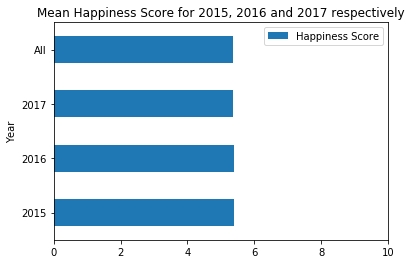

In [25]:
#Use pivot_table method to index the data by year and Happiness Score
pivot_combined=combined.pivot_table(values="Happiness Score", index="Year",margins=True)

#Plot a horizontal bar plot, using Year as the y axis and happiness score as the x asis
pivot_combined.plot(kind="barh", xlim=(0,10), title="Mean Happiness Score for 2015, 2016 and 2017 respectively")


From the diagram shown above, we see that the Happiness Score from 2015 to 2017 stayed the same..So, there was no change in happiness score across the 3 years.

# DATA TRANSFORMATION

You may recall from previous missions that each of the columns below contains the estimated extent to which each factor contributes to the happiness score:

- Economy (GDP per Capita)
- Family
- Health (Life Expectancy)
- Freedom
- Trust (Government Corruption)
- Generosity

Throughout this mission, we'll refer to the columns above as the "factor" columns. We'll work to answer the following question in this mission:

Which of the factors above contribute the most to the happiness score?

As a reminder, the World Happiness Report assigns each country a happiness score based on a poll question that asks respondents to rank their life on a scale of 0 - 10.

However, in order to answer this question, we need to manipulate our data into a format that makes it easier to analyze. We'll explore the following functions and methods to perform this task:

Series.map()
Series.apply()
DataFrame.applymap()
DataFrame.apply()
pd.melt()

In [26]:
#We will be focusing on World Happiness for just 2015.
#Since we have read it into our environment already, we will just
#call it and display the first five rows.

happiness2015.head()


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [27]:
#Looking at the colunms, we see that it exists in a not too palatble format, hence,
#we need to rename the colunms (the ones we have interest in)

mapping={"Economy (GDP per Capita)": "Economy", "Health (Life Expectancy)":"Health",
         "Trust (Government Corruption)":"Trust"}

happiness2015=happiness2015.rename(mapping, axis = 1)

happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


Looking at the rows in our dataset from Happiness Rank colunm down, we see that each column contains only numeric data. And tgese values represent the extent to which factor contributes to the happiness score. An attempt to analyze all of these numbers across multiple columns is going to be a daunting task.

Since, r reference or point of interest is in the Happiness score, we can look for a way to rank other values in terms of high and low impact on the Happiness Score.

Pandas has a coyple of methods that cqn be used to apply a custom function on data.
- Series.map()

- Series.apply()

In [28]:
happiness2015=happiness2015[["Country", "Happiness Score", "Economy","Family", "Health","Freedom", "Trust", "Generosity"]]

happiness2015.head()

,Country,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


Looking at the rows in our dataset from Happiness Rank colunm down, we see that each column contains only numeric data. And tgese values represent the extent to which factor contributes to the happiness score. An attempt to analyze all of these numbers across multiple columns is going to be a daunting task.

Hence, we will have to create a custom function and appropriate values in a defined manner. Say any value less than 1 should be "Low", and any greater than 1 should be "high".

## SERIES.MAP AND SERIES.APPLY

In [29]:
#define a custom function
def label(element):
    if element >1:
        return "High"
    else:
        return "Low"
#Like we stated earlier, pandas has a couple of metjods that aids
#in data transformation.
#the Series.map ( )
#the Series.apply ( ), these metjods helps us in apply the custom function to our data

#It is also worthy of not, that both metjods stated above apply the function elemnt wise toa  column.
#By element wise, we mean one value at a time in the Series

economy_impact_map=happiness2015["Economy"].map(label)

economy_impact_apply=happiness2015["Economy"].apply(label)

In [30]:
economy_impact_map.head()

0    High
1    High
2    High
3    High
4    High
Name: Economy, dtype: object

In [31]:
economy_impact_apply

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object

From the outputs above, we can see that the function that has been passed into the method has acted on each values in the Series and effected the changes required.

Now, we will check to see if both economy_impact_apply and economy_impact_map are equal.

In [32]:
#Check for equality
economy_impact_apply.equals(economy_impact_map)

True

A check for equality shows us that noth map and apply method on pandas Series are equal. If so, then, what is the difference(s) between them?

IT is worth noting that these results dont modify the original DF.

The main difference between both method is seen in the fact that the map method can not take any other argument apart from the function passed in.
While the apply method can take an argument. Lets say in our created function above, a value was passed into the function as an argument like ao....See cell below.

In [33]:
#def label(elment,x):
    #if element>x:
        #return "High"
    #else:
        #return "Low"
    
#From this function, we see that two arguments were passed in
#if we call the map method and the call the function, along side the argument x, it will throw an error.
#see sample;

#economy_map=happiness2015["Economy"].map(label, x=.9)
#A type error will be thrown, telling us that the 
#keyword x is not supposed to be in the map method

In [34]:
#If we attempt to do same using the apply method, lets see what happens.
#def label(element, x):
    #if element > x:
        #return "High"
    #else:
        #return "Low"
#economy_apply=happiness2015["Economy"].apply(label, x=.9)

We see that with the apply method and an additional argument to the fuction, an error wasn't thrown.So this is a key difference between both.

## DATAFRAME.APPLYMAP METHOD

So far, we habe transformed only one column at a time usong the Series.map and Series.apply methods. What if we wanted to transform multiple columns at once, we use the Df.applymap method.

In [35]:
factors=["Economy", 
         "Family",
         "Health", 
         "Freedom", 
         "Trust", 
         "Generosity"]
factors_impact=happiness2015[factors].applymap(label)
factors_impact

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low
...,...,...,...,...,...,...
153,Low,Low,Low,Low,Low,Low
154,Low,Low,Low,Low,Low,Low
155,Low,Low,Low,Low,Low,Low
156,Low,Low,Low,Low,Low,Low


## DATAFRAME.APPLY METHOD

We can also use the Df.apply method. This method is quite different from the three (3) previous metjods we learnt, because in the previous methods, the function is applied element wise on the columns. But in the case of Df.apply( ), the function is applied only the axis. 

Now, let's use the method to calculate the number of High and Low in our factors_impact df. We will apply the method to all columns.

In [36]:
factors_impact.apply(pd.value_counts)

,Economy,Family,Health,Freedom,Trust,Generosity
High,66,89,2,NaN,NaN,NaN
Low,92,69,156,158.0,158.0,158.0


We can think of rhe Df.apply method as a collection of Series.apply or map methods joined together or performed once. 

Now, we will use the df.apply method to calcute the percentage of High and Low for each column.

In [37]:
def v_counts(col):
    total=col.value_counts().sum()
    present_fig=col.value_counts()
    return present_fig/ total

factors_impact_pct=factors_impact.apply(v_counts)

factors_impact_pct

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,NaN,NaN,NaN
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0


It is important to note that the apply metjod should only be used when vectorised method does not exist.
Now, lets see if we can use the vectorised method for our example above.

In [38]:
factors_impact.apply(pd.value_counts)/factors_impact.apply(pd.value_counts).sum()

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,NaN,NaN,NaN
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0


## PD.MELT FUNCTION

Having considered several methods that aides in transforming our data to enhance analysis, we can also use a function that makes things way easier in a way of reshaping our daframe entirely, by creating new columns and assigned the needed values into these created columns. A function that does this flawlessly is known as **Pd.Melt()**. To understand this function, we will walk through a subset of our happiness 2015 dataset.

In [39]:
happy_two=happiness2015[["Country", "Happiness Score", "Economy", "Family","Health"]]

happy_two.head(2)

,Country,Happiness Score,Economy,Family,Health
0,Switzerland,7.587,1.39651,1.34951,0.94143
1,Iceland,7.561,1.30232,1.40223,0.94784


In [40]:
melt=pd.melt(happiness2015, id_vars=["Country"], value_vars=["Economy", "Family", "Health"])

             

In [41]:
melt

,Country,variable,value
0,Switzerland,Economy,1.39651
1,Iceland,Economy,1.30232
2,Denmark,Economy,1.32548
3,Norway,Economy,1.45900
4,Canada,Economy,1.32629
...,...,...,...
469,Rwanda,Health,0.42864
470,Benin,Health,0.31910
471,Syria,Health,0.72193
472,Burundi,Health,0.22396
